In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the data
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Combine the East and West features
features_east = [col for col in df_train.columns if col.endswith('_East')]
features_west = [col for col in df_train.columns if col.endswith('_West')]

# Ensure to exclude SemifinalWinner_East_West
if 'SemifinalWinner_East_West' in features_east:
    features_east.remove('SemifinalWinner_East_West')

if 'SemifinalWinner_East_West' in features_west:
    features_west.remove('SemifinalWinner_East_West')

# The target variable is SemifinalWinner_East_West
y_train = df_train["SemifinalWinner_East_West"]

# Combine the East and West features
features = features_east + features_west

# Define non-numeric columns (such as postal codes or conference)
non_numeric_columns = ['InstitutionPostalCode_East', 'InstitutionConference_East',
                       'InstitutionPostalCode_West', 'InstitutionConference_West']

# Identify numeric columns for scaling (exclude non-numeric columns)
numeric_features = [col for col in features if col not in non_numeric_columns]

# Preprocessing for numeric and non-numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(), non_numeric_columns)  # One-hot encode non-numeric features
    ])

# Create the pipeline with preprocessing and the classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(df_train[features], y_train)

# Make predictions on the test data
df_test["SemifinalWinner_East_West"] = model.predict(df_test[features])

# Save the predictions to a CSV (only include the prediction column)
df_test[['SemifinalWinner_East_West']].to_csv("predictions_EW.csv", index=False)

print("Predictions saved to predictions.csv ✅")


Predictions saved to predictions.csv ✅


In [ ]:
df_test.head()

,CustomerID,CustomerPostalCode,CustomerPostalCodeLatitude,CustomerPostalCodeLongitude,CustomerDMACode,CustomerDMADescription,NCAACustomerRecordCreated,BracketEntryId,BracketEntryCreatedDate,RegionWinner_East,...,InstitutionPostalCode_Midwest,InstitutionConference_Midwest,InstitutionEnrollment_Male_Midwest,InstitutionEnrollment_Female_Midwest,InstitutionEnrollment_Total_Midwest,RegularSeasonWins_Midwest,RegularSeasonLosses_Midwest,RegularSeasonAverageAttendance_Midwest,RegularSeasonAverageScore_Midwest,SemifinalWinner_East_West
0,73662,27539,35.7225,-78.8408,560.0,RALEIGH - DURHAM (FAYETVLLE),NaN,2074118,NaN,164,...,47907-2040,Big Ten Conference,21670,16279,37949,29,4,13329,83.39,164
1,6679,97206,45.4840,-122.5973,820.0,"PORTLAND, OR",NaN,2692634,NaN,164,...,66045,Big 12 Conference,8859,9845,18704,22,10,13952,75.25,164
2,63024,42754,37.4603,-86.3249,529.0,LOUISVILLE,NaN,1252684,NaN,311,...,68178-0001,Big East Conference,1789,2501,4290,23,9,13651,80.53,311
3,60371,98178,47.4924,-122.2359,819.0,SEATTLE - TACOMA,NaN,1950205,NaN,164,...,47907-2040,Big Ten Conference,21670,16279,37949,29,4,13329,83.39,164
4,18415,19038,40.1096,-75.1550,504.0,PHILADELPHIA,NaN,2756293,NaN,164,...,68178-0001,Big East Conference,1789,2501,4290,23,9,13651,80.53,164


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the data


# Combine the South and Midwest features
features_south = [col for col in df_train.columns if col.endswith('_South')]
features_midwest = [col for col in df_train.columns if col.endswith('_Midwest')]

# Ensure to exclude SemifinalWinner_South_Midwest
if 'SemifinalWinner_South_Midwest' in features_south:
    features_south.remove('SemifinalWinner_South_Midwest')

if 'SemifinalWinner_South_Midwest' in features_midwest:
    features_midwest.remove('SemifinalWinner_South_Midwest')

# The target variable is SemifinalWinner_South_Midwest
y_train = df_train["SemifinalWinner_South_Midwest"]

# Combine the South and Midwest features
features = features_south + features_midwest

# Define non-numeric columns (such as postal codes or conference)
non_numeric_columns = ['InstitutionPostalCode_South', 'InstitutionConference_South',
                       'InstitutionPostalCode_Midwest', 'InstitutionConference_Midwest']

# Identify numeric columns for scaling (exclude non-numeric columns)
numeric_features = [col for col in features if col not in non_numeric_columns]

# Preprocessing for numeric and non-numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(), non_numeric_columns)  # One-hot encode non-numeric features
    ])

# Create the pipeline with preprocessing and the classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(df_train[features], y_train)

# Make predictions on the test data
df_test["SemifinalWinner_South_Midwest"] = model.predict(df_test[features])

# Save the predictions to a CSV (only include the prediction column)
df_test[['SemifinalWinner_South_Midwest']].to_csv("predictionsSM1.csv", index=False)

print("Predictions saved to predictionsSM1.csv ✅")


Predictions saved to predictionsSM1.csv ✅


In [ ]:
df_test.head()

,CustomerID,CustomerPostalCode,CustomerPostalCodeLatitude,CustomerPostalCodeLongitude,CustomerDMACode,CustomerDMADescription,NCAACustomerRecordCreated,BracketEntryId,BracketEntryCreatedDate,RegionWinner_East,...,InstitutionConference_Midwest,InstitutionEnrollment_Male_Midwest,InstitutionEnrollment_Female_Midwest,InstitutionEnrollment_Total_Midwest,RegularSeasonWins_Midwest,RegularSeasonLosses_Midwest,RegularSeasonAverageAttendance_Midwest,RegularSeasonAverageScore_Midwest,SemifinalWinner_East_West,SemifinalWinner_South_Midwest
0,73662,27539,35.7225,-78.8408,560.0,RALEIGH - DURHAM (FAYETVLLE),NaN,2074118,NaN,164,...,Big Ten Conference,21670,16279,37949,29,4,13329,83.39,164,288
1,6679,97206,45.4840,-122.5973,820.0,"PORTLAND, OR",NaN,2692634,NaN,164,...,Big 12 Conference,8859,9845,18704,22,10,13952,75.25,164,193
2,63024,42754,37.4603,-86.3249,529.0,LOUISVILLE,NaN,1252684,NaN,311,...,Big East Conference,1789,2501,4290,23,9,13651,80.53,311,334
3,60371,98178,47.4924,-122.2359,819.0,SEATTLE - TACOMA,NaN,1950205,NaN,164,...,Big Ten Conference,21670,16279,37949,29,4,13329,83.39,164,288
4,18415,19038,40.1096,-75.1550,504.0,PHILADELPHIA,NaN,2756293,NaN,164,...,Big East Conference,1789,2501,4290,23,9,13651,80.53,164,387


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# Features for National Champion prediction
features = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]

# Target variable
y_train = df_train["NationalChampion"]

# Preprocessing (scale numerical features)
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Create pipeline with classifier
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(df_train[features], y_train)

# Predict the National Champion
df_test["NationalChampion"] = model.predict(df_test[features])

# Save predictions
df_test[['BracketEntryId','SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_with_all.csv", index=False)

print("Predictions saved to predictions_NationalChampion.csv ✅")


Predictions saved to predictions_NationalChampion.csv ✅


In [ ]:
df_test.head(8)

,CustomerID,CustomerPostalCode,CustomerPostalCodeLatitude,CustomerPostalCodeLongitude,CustomerDMACode,CustomerDMADescription,NCAACustomerRecordCreated,BracketEntryId,BracketEntryCreatedDate,RegionWinner_East,...,InstitutionEnrollment_Male_Midwest,InstitutionEnrollment_Female_Midwest,InstitutionEnrollment_Total_Midwest,RegularSeasonWins_Midwest,RegularSeasonLosses_Midwest,RegularSeasonAverageAttendance_Midwest,RegularSeasonAverageScore_Midwest,SemifinalWinner_East_West,SemifinalWinner_South_Midwest,NationalChampion
0,73662,27539,35.7225,-78.8408,560.0,RALEIGH - DURHAM (FAYETVLLE),NaN,2074118,NaN,164,...,21670,16279,37949,29,4,13329,83.39,164,288,164
1,6679,97206,45.4840,-122.5973,820.0,"PORTLAND, OR",NaN,2692634,NaN,164,...,8859,9845,18704,22,10,13952,75.25,164,193,164
2,63024,42754,37.4603,-86.3249,529.0,LOUISVILLE,NaN,1252684,NaN,311,...,1789,2501,4290,23,9,13651,80.53,311,334,334
3,60371,98178,47.4924,-122.2359,819.0,SEATTLE - TACOMA,NaN,1950205,NaN,164,...,21670,16279,37949,29,4,13329,83.39,164,288,164
4,18415,19038,40.1096,-75.1550,504.0,PHILADELPHIA,NaN,2756293,NaN,164,...,1789,2501,4290,23,9,13651,80.53,164,387,164
5,55163,12189,42.7298,-73.7123,532.0,ALBANY - SCHENECTADY - TROY,NaN,2992270,NaN,164,...,21670,16279,37949,29,4,13329,83.39,164,559,164
6,6472,70062,29.9912,-90.2479,622.0,NEW ORLEANS,NaN,176849,NaN,164,...,15269,18536,33805,24,8,16065,79.47,164,288,164
7,2759,75234,32.9245,-96.8938,623.0,DALLAS - FT. WORTH,NaN,2091692,NaN,164,...,15269,18536,33805,24,8,16065,79.47,164,694,164


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the data


# Identify relevant feature columns
features_south = [col for col in df_train.columns if col.endswith('_South')]
features_midwest = [col for col in df_train.columns if col.endswith('_Midwest')]

# Ensure 'SemifinalWinner_South_Midwest' is not included in feature selection
features_south = [col for col in features_south if col != 'SemifinalWinner_South_Midwest']
features_midwest = [col for col in features_midwest if col != 'SemifinalWinner_South_Midwest']

# Combine the features from both regions
features = features_south + features_midwest

# Define non-numeric columns (such as postal codes or conference names)
non_numeric_columns = ['InstitutionPostalCode_South', 'InstitutionConference_South',
                       'InstitutionPostalCode_Midwest', 'InstitutionConference_Midwest']

# Identify numeric columns (exclude categorical ones)
numeric_features = [col for col in features if col not in non_numeric_columns]

# Preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_numeric_columns)  # One-hot encode categorical features
    ])

# Create a pipeline with preprocessing and the classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
y_train = df_train["SemifinalWinner_South_Midwest"]
model.fit(df_train[features], y_train)

# Make predictions and add them to df_test
df_test["SemifinalWinner_South_Midwest"] = model.predict(df_test[features])

# Save the updated df_test to a CSV (optional)
df_test.to_csv("test_merged_with_predictions.csv", index=False)

# Save only the prediction results
df_test[['SemifinalWinner_South_Midwest']].to_csv("predictionsSM1.csv", index=False)

print("Predictions added to df_test and saved to CSV ✅")


Predictions added to df_test and saved to CSV ✅


In [ ]:
print(df_test.head())

   CustomerID CustomerPostalCode  CustomerPostalCodeLatitude  \
0       73662              27539                     35.7225   
1        6679              97206                     45.4840   
2       63024              42754                     37.4603   
3       60371              98178                     47.4924   
4       18415              19038                     40.1096   

   CustomerPostalCodeLongitude  CustomerDMACode        CustomerDMADescription  \
0                     -78.8408            560.0  RALEIGH - DURHAM (FAYETVLLE)   
1                    -122.5973            820.0                  PORTLAND, OR   
2                     -86.3249            529.0                    LOUISVILLE   
3                    -122.2359            819.0              SEATTLE - TACOMA   
4                     -75.1550            504.0                  PHILADELPHIA   

   NCAACustomerRecordCreated  BracketEntryId  BracketEntryCreatedDate  \
0                        NaN         2074118           

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Load the previously predicted semifinal winners
df_test_EW = pd.read_csv("predictions_EW.csv")
df_test_SM = pd.read_csv("predictionsSM1.csv")

# Add predictions to test dataset
df_test["SemifinalWinner_East_West"] = df_test_EW["SemifinalWinner_East_West"]
df_test["SemifinalWinner_South_Midwest"] = df_test_SM["SemifinalWinner_South_Midwest"]

# Features for National Champion prediction
features = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]

# Target variable
y_train = df_train["NationalChampion"]

# Convert NationalChampion to categorical values (if not already)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Preprocessing (scale numerical features)
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Create pipeline with XGBoost classifier for multi-class classification
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        objective="multi:softmax",    # Multi-class classification objective
        eval_metric="mlogloss",        # Evaluation metric for multi-class
        num_class=len(label_encoder.classes_),  # Number of classes
        random_state=42,
        n_estimators=100,
        learning_rate=0.05,
        max_depth=6,
        colsample_bytree=0.8,
        subsample=0.8
    ))
])

# Train the model
model.fit(df_train[features], y_train)

# Predict the National Champion
df_test["NationalChampion"] = model.predict(df_test[features])

# Convert the predicted labels back to original class labels
df_test["NationalChampion"] = label_encoder.inverse_transform(df_test["NationalChampion"])

# Save predictions, including semifinal winners and national champion
df_test[['BracketEntryId','SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_with_xgb_multi.csv", index=False)

print("Predictions saved to predictions_with_xgb_multi.csv ✅")


Predictions saved to predictions_with_xgb_multi.csv ✅


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import numpy as np

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Load the previously predicted semifinal winners
df_test_EW = pd.read_csv("predictions_EW.csv")
df_test_SM = pd.read_csv("predictionsSM1.csv")

# Add predictions to test dataset
df_test["SemifinalWinner_East_West"] = df_test_EW["SemifinalWinner_East_West"]
df_test["SemifinalWinner_South_Midwest"] = df_test_SM["SemifinalWinner_South_Midwest"]

# Features for National Champion prediction
features = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]

# Target variable
y_train = df_train["NationalChampion"]

# Convert NationalChampion to categorical values (if not already)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Split train data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(df_train[features], y_train, test_size=0.2, random_state=42)

# Preprocessing (scale numerical features)
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Create pipeline with XGBoost classifier for multi-class classification
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        objective="multi:softmax",    # Multi-class classification objective
        eval_metric="mlogloss",        # Evaluation metric for multi-class
        num_class=len(label_encoder.classes_),  # Number of classes
        random_state=42,
        n_estimators=100,
        learning_rate=0.05,
        max_depth=6,
        colsample_bytree=0.8,
        subsample=0.8
    ))
])

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 6, 10],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0],
    'classifier__min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations to search
    scoring="accuracy",
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42
)

# Fit the model with hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Early stopping to prevent overfitting
best_model.named_steps['classifier'].fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=100)

# Predict the National Champion on the validation set
y_val_pred = best_model.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy}")

# Predict National Champion on the test set
df_test["NationalChampion"] = best_model.predict(df_test[features])

# Convert the predicted labels back to original class labels
df_test["NationalChampion"] = label_encoder.inverse_transform(df_test["NationalChampion"])

# Save predictions, including semifinal winners and national champion
df_test[['BracketEntryId', 'SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_with_xgb_improved.csv", index=False)

print("Predictions saved to predictions_with_xgb_improved.csv ✅")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Load the previously predicted semifinal winners
df_test_EW = pd.read_csv("predictions_EW.csv")
df_test_SM = pd.read_csv("predictionsSM1.csv")

# Add predictions to test dataset
df_test["SemifinalWinner_East_West"] = df_test_EW["SemifinalWinner_East_West"]
df_test["SemifinalWinner_South_Midwest"] = df_test_SM["SemifinalWinner_South_Midwest"]

# Features for National Champion prediction
features = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]

# Target variable
y_train = df_train["NationalChampion"]

# Convert target variable to categorical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Ensure `X_train` matches `y_train` in size
X_train = df_train[features]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Preprocessing (scale numerical features)
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Define the XGBoost classifier
xgb = XGBClassifier(
    objective="multi:softmax",
    eval_metric="mlogloss",
    num_class=len(label_encoder.classes_),
    random_state=42,
    n_jobs=-1  # Use all CPU cores for faster training
)

# Hyperparameter tuning
param_dist = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 6, 9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "subsample": [0.7, 0.8, 0.9]
}

# Use Stratified K-Fold to handle class imbalance
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=10, cv=skf, n_jobs=-1, verbose=1
)

# Train the model with hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Create pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

# Train the pipeline on full training data
model.fit(X_train, y_train)

# Predict on test set
df_test["NationalChampion"] = model.predict(df_test[features])

# Convert predicted labels back to original class names
df_test["NationalChampion"] = label_encoder.inverse_transform(df_test["NationalChampion"])

# Save predictions, including semifinal winners and national champion
df_test[['BracketEntryId', 'SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_with_xgb_optimized.csv", index=False)

print("Predictions saved to predictions_with_xgb_optimized.csv ✅")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

Accuracy for SemifinalWinner_East_West: 0.6706
Accuracy for SemifinalWinner_South_Midwest: 0.6284
Accuracy for NationalChampion: 0.4327
Predictions saved to predictions_random_forest.csv ✅


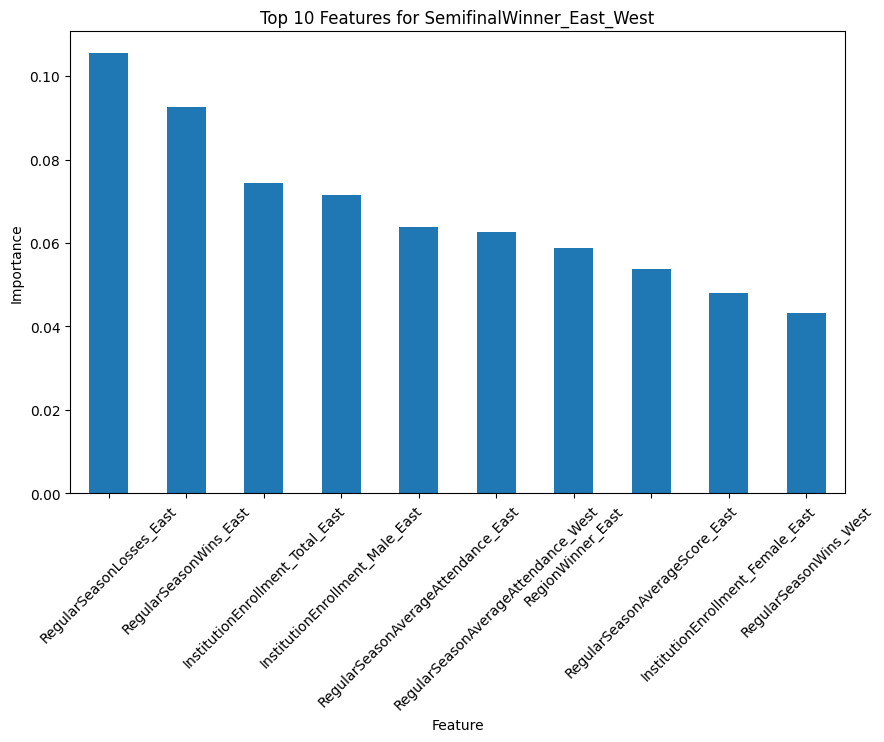

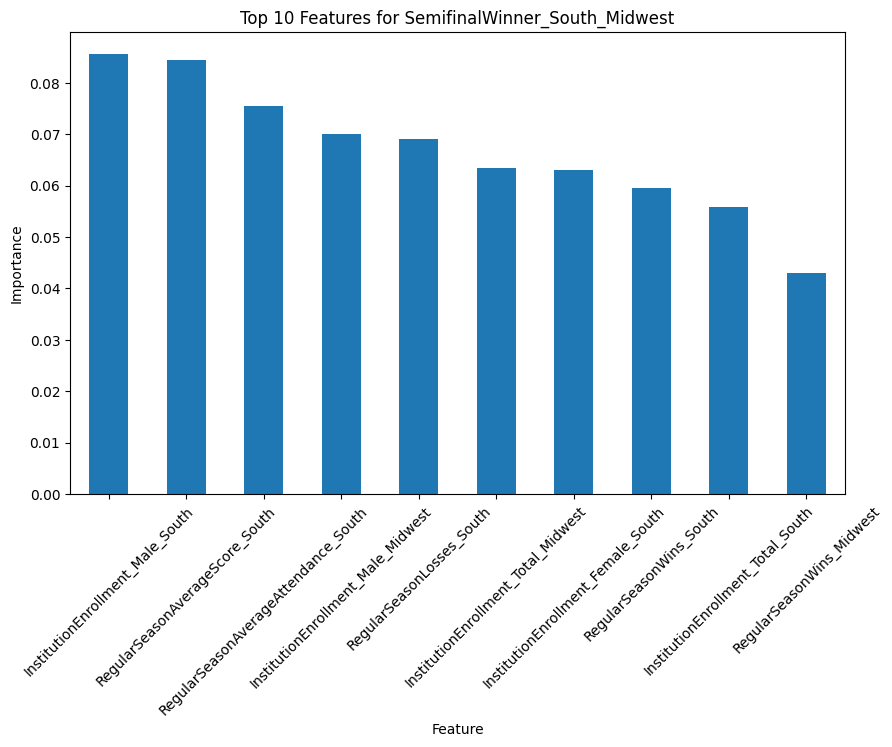

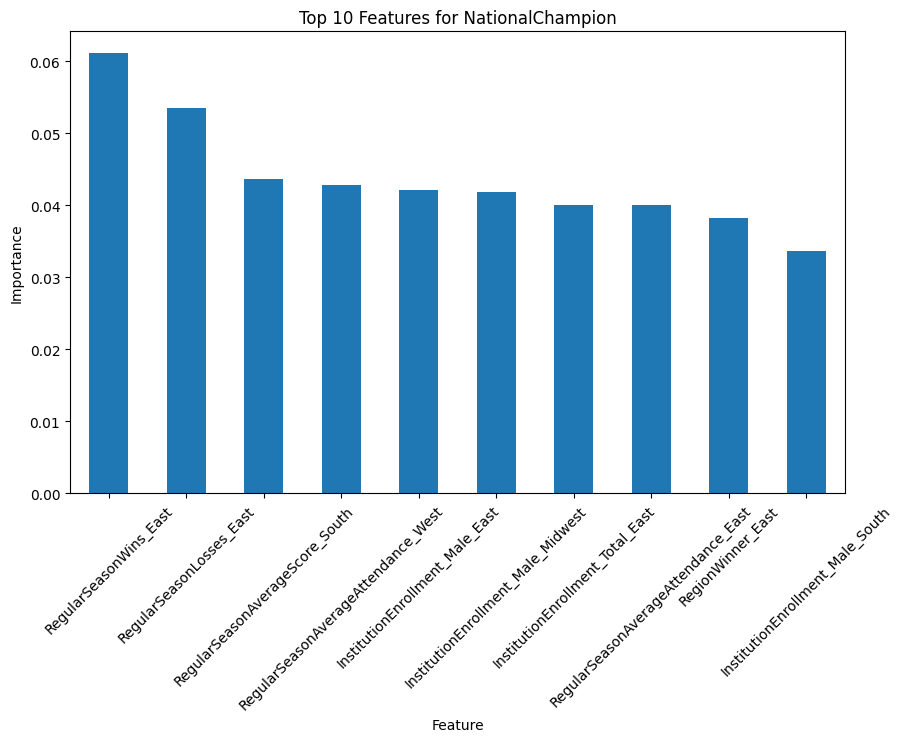

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Features for prediction
features = [
    "RegionWinner_East", "RegionWinner_West", "RegionWinner_South", "RegionWinner_Midwest",
    "InstitutionEnrollment_Male_East", "InstitutionEnrollment_Female_East", "InstitutionEnrollment_Total_East",
    "InstitutionEnrollment_Male_West", "InstitutionEnrollment_Female_West", "InstitutionEnrollment_Total_West",
    "InstitutionEnrollment_Male_South", "InstitutionEnrollment_Female_South", "InstitutionEnrollment_Total_South",
    "InstitutionEnrollment_Male_Midwest", "InstitutionEnrollment_Female_Midwest", "InstitutionEnrollment_Total_Midwest",
    "RegularSeasonWins_East", "RegularSeasonLosses_East", "RegularSeasonAverageAttendance_East", "RegularSeasonAverageScore_East",
    "RegularSeasonWins_West", "RegularSeasonLosses_West", "RegularSeasonAverageAttendance_West", "RegularSeasonAverageScore_West",
    "RegularSeasonWins_South", "RegularSeasonLosses_South", "RegularSeasonAverageAttendance_South", "RegularSeasonAverageScore_South",
    "RegularSeasonWins_Midwest", "RegularSeasonLosses_Midwest", "RegularSeasonAverageAttendance_Midwest", "RegularSeasonAverageScore_Midwest"
]

# Targets to predict
target_columns = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest", "NationalChampion"]

# Preprocessing: Scale numeric features
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Model: RandomForestClassifier for feature importance
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Dictionary to store feature importances
feature_importance_dict = {}

# Train and predict for each target
for target in target_columns:
    # Extract target variable
    y_train = df_train[target]

    # Split the data into training and validation sets
    X_train, X_val, y_train_split, y_val_split = train_test_split(df_train[features], y_train, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train_split)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Evaluate model performance
    accuracy = accuracy_score(y_val_split, y_pred)
    print(f"Accuracy for {target}: {accuracy:.4f}")

    # Get feature importances from the trained RandomForest model
    feature_importances = model.named_steps["classifier"].feature_importances_

    # Store importances
    feature_importance_dict[target] = pd.Series(feature_importances, index=features).sort_values(ascending=False)

    # Make predictions for the test dataset
    df_test[target] = model.predict(df_test[features])

# Save predictions
df_test[['SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_random_forest.csv", index=False)
print("Predictions saved to predictions_random_forest.csv ✅")

# Plot feature importances
for target, importances in feature_importance_dict.items():
    plt.figure(figsize=(10, 6))
    importances[:10].plot(kind="bar")
    plt.title(f"Top 10 Features for {target}")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Features for prediction
features = [
    "RegionWinner_East", "RegionWinner_West", "RegionWinner_South", "RegionWinner_Midwest",
    "InstitutionEnrollment_Male_East", "InstitutionEnrollment_Female_East", "InstitutionEnrollment_Total_East",
    "InstitutionEnrollment_Male_West", "InstitutionEnrollment_Female_West", "InstitutionEnrollment_Total_West",
    "InstitutionEnrollment_Male_South", "InstitutionEnrollment_Female_South", "InstitutionEnrollment_Total_South",
    "InstitutionEnrollment_Male_Midwest", "InstitutionEnrollment_Female_Midwest", "InstitutionEnrollment_Total_Midwest",
    "RegularSeasonWins_East", "RegularSeasonLosses_East", "RegularSeasonAverageAttendance_East", "RegularSeasonAverageScore_East",
    "RegularSeasonWins_West", "RegularSeasonLosses_West", "RegularSeasonAverageAttendance_West", "RegularSeasonAverageScore_West",
    "RegularSeasonWins_South", "RegularSeasonLosses_South", "RegularSeasonAverageAttendance_South", "RegularSeasonAverageScore_South",
    "RegularSeasonWins_Midwest", "RegularSeasonLosses_Midwest", "RegularSeasonAverageAttendance_Midwest", "RegularSeasonAverageScore_Midwest"
]

# Targets to predict
semifinal_targets = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]
national_champion_target = "NationalChampion"

# Dictionary to store predictions for semifinals
semifinal_predictions = {}

# Preprocessing: Scale numeric features
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Train and predict for each semifinal target
for target in semifinal_targets:
    # Extract target variable
    y_train = df_train[target]

    # Split the data
    X_train, X_val, y_train_split, y_val_split = train_test_split(df_train[features], y_train, test_size=0.2, random_state=42)

    # Train a RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train_split)

    # Get feature importance and select top 10 features
    feature_importance = pd.Series(model.feature_importances_, index=features).nlargest(10).index.tolist()

    # Retrain using only the top 10 features
    model.fit(X_train[feature_importance], y_train_split)

    # Predict semifinal results
    df_test[target] = model.predict(df_test[feature_importance])
    semifinal_predictions[target] = df_test[target]  # Store predictions

    # Evaluate model performance
    y_pred = model.predict(X_val[feature_importance])
    accuracy = accuracy_score(y_val_split, y_pred)
    print(f"Accuracy for {target}: {accuracy:.4f}")

# Create new features for the National Champion prediction based on semifinal winners
df_train_national = df_train.copy()
df_test_national = df_test.copy()

df_train_national["SemifinalWinner_East_West"] = df_train["SemifinalWinner_East_West"]
df_train_national["SemifinalWinner_South_Midwest"] = df_train["SemifinalWinner_South_Midwest"]

df_test_national["SemifinalWinner_East_West"] = semifinal_predictions["SemifinalWinner_East_West"]
df_test_national["SemifinalWinner_South_Midwest"] = semifinal_predictions["SemifinalWinner_South_Midwest"]

# Train final model for National Champion
X_train_national, X_val_national, y_train_national, y_val_national = train_test_split(
    df_train_national[semifinal_targets], df_train[national_champion_target], test_size=0.2, random_state=42
)

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_national, y_train_national)

# Predict National Champion
df_test_national[national_champion_target] = final_model.predict(df_test_national[semifinal_targets])

# Evaluate National Champion model
y_pred_national = final_model.predict(X_val_national)
accuracy_national = accuracy_score(y_val_national, y_pred_national)
print(f"Accuracy for {national_champion_target}: {accuracy_national:.4f}")

# Save final predictions
df_test_national[['BracketEntryId','SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_national_champion.csv", index=False)

print("Predictions saved to predictions_national_champion.csv ✅")


Accuracy for SemifinalWinner_East_West: 0.6690
Accuracy for SemifinalWinner_South_Midwest: 0.6307
Accuracy for NationalChampion: 0.6159
Predictions saved to predictions_national_champion.csv ✅


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Features for prediction
features = [
    "RegionWinner_East", "RegionWinner_West", "RegionWinner_South", "RegionWinner_Midwest",
    "InstitutionEnrollment_Male_East", "InstitutionEnrollment_Female_East", "InstitutionEnrollment_Total_East",
    "InstitutionEnrollment_Male_West", "InstitutionEnrollment_Female_West", "InstitutionEnrollment_Total_West",
    "InstitutionEnrollment_Male_South", "InstitutionEnrollment_Female_South", "InstitutionEnrollment_Total_South",
    "InstitutionEnrollment_Male_Midwest", "InstitutionEnrollment_Female_Midwest", "InstitutionEnrollment_Total_Midwest",
    "RegularSeasonWins_East", "RegularSeasonLosses_East", "RegularSeasonAverageAttendance_East", "RegularSeasonAverageScore_East",
    "RegularSeasonWins_West", "RegularSeasonLosses_West", "RegularSeasonAverageAttendance_West", "RegularSeasonAverageScore_West",
    "RegularSeasonWins_South", "RegularSeasonLosses_South", "RegularSeasonAverageAttendance_South", "RegularSeasonAverageScore_South",
    "RegularSeasonWins_Midwest", "RegularSeasonLosses_Midwest", "RegularSeasonAverageAttendance_Midwest", "RegularSeasonAverageScore_Midwest"
]

# Targets to predict
semifinal_targets = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]
national_champion_target = "NationalChampion"

# Dictionary to store predictions for semifinals
semifinal_predictions = {}

# Preprocessing: Scale numeric features
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train and predict for each semifinal target
for target in semifinal_targets:
    # Extract target variable
    y_train = df_train[target]

    # Split the data
    X_train, X_val, y_train_split, y_val_split = train_test_split(df_train[features], y_train, test_size=0.2, random_state=42)

    # Hyperparameter tuning using RandomizedSearchCV
    model = RandomForestClassifier(random_state=42)
    search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
    search.fit(X_train, y_train_split)

    # Get best estimator
    best_model = search.best_estimator_

    # Get feature importance and select top 10 features
    feature_importance = pd.Series(best_model.feature_importances_, index=features).nlargest(10).index.tolist()

    # Retrain using only the top 10 features
    best_model.fit(X_train[feature_importance], y_train_split)

    # Predict semifinal results
    df_test[target] = best_model.predict(df_test[feature_importance])
    semifinal_predictions[target] = df_test[target]  # Store predictions

    # Evaluate model performance
    y_pred = best_model.predict(X_val[feature_importance])
    accuracy = accuracy_score(y_val_split, y_pred)
    print(f"Optimized Accuracy for {target}: {accuracy:.4f}")

# Create new features for the National Champion prediction based on semifinal winners
df_train_national = df_train.copy()
df_test_national = df_test.copy()

df_train_national["SemifinalWinner_East_West"] = df_train["SemifinalWinner_East_West"]
df_train_national["SemifinalWinner_South_Midwest"] = df_train["SemifinalWinner_South_Midwest"]

df_test_national["SemifinalWinner_East_West"] = semifinal_predictions["SemifinalWinner_East_West"]
df_test_national["SemifinalWinner_South_Midwest"] = semifinal_predictions["SemifinalWinner_South_Midwest"]

# Train final model for National Champion
X_train_national, X_val_national, y_train_national, y_val_national = train_test_split(
    df_train_national[semifinal_targets], df_train[national_champion_target], test_size=0.2, random_state=42
)

# Hyperparameter tuning for National Champion model
final_model = RandomForestClassifier(random_state=42)
search_final = RandomizedSearchCV(final_model, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
search_final.fit(X_train_national, y_train_national)

# Get best estimator for National Champion
best_final_model = search_final.best_estimator_

# Predict National Champion
df_test_national[national_champion_target] = best_final_model.predict(df_test_national[semifinal_targets])

# Evaluate National Champion model
y_pred_national = best_final_model.predict(X_val_national)
accuracy_national = accuracy_score(y_val_national, y_pred_national)
print(f"Optimized Accuracy for {national_champion_target}: {accuracy_national:.4f}")

# Save final predictions
df_test_national[['BracketEntryId','SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_national_championV1.csv", index=False)

print("Optimized predictions saved to predictions_national_championV1.csv ✅")


Optimized Accuracy for SemifinalWinner_East_West: 0.6694
Optimized Accuracy for SemifinalWinner_South_Midwest: 0.6311
Optimized Accuracy for NationalChampion: 0.6160
Optimized predictions saved to predictions_national_championV1.csv ✅


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Features for prediction
features = [
    "RegionWinner_East", "RegionWinner_West", "RegionWinner_South", "RegionWinner_Midwest",
    "InstitutionEnrollment_Male_East", "InstitutionEnrollment_Female_East", "InstitutionEnrollment_Total_East",
    "InstitutionEnrollment_Male_West", "InstitutionEnrollment_Female_West", "InstitutionEnrollment_Total_West",
    "InstitutionEnrollment_Male_South", "InstitutionEnrollment_Female_South", "InstitutionEnrollment_Total_South",
    "InstitutionEnrollment_Male_Midwest", "InstitutionEnrollment_Female_Midwest", "InstitutionEnrollment_Total_Midwest",
    "RegularSeasonWins_East", "RegularSeasonLosses_East", "RegularSeasonAverageAttendance_East", "RegularSeasonAverageScore_East",
    "RegularSeasonWins_West", "RegularSeasonLosses_West", "RegularSeasonAverageAttendance_West", "RegularSeasonAverageScore_West",
    "RegularSeasonWins_South", "RegularSeasonLosses_South", "RegularSeasonAverageAttendance_South", "RegularSeasonAverageScore_South",
    "RegularSeasonWins_Midwest", "RegularSeasonLosses_Midwest", "RegularSeasonAverageAttendance_Midwest", "RegularSeasonAverageScore_Midwest"
]

# Targets to predict
semifinal_targets = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]
national_champion_target = "NationalChampion"

# Dictionary to store predictions for semifinals
semifinal_predictions = {}

# Preprocessing: Scale numeric features
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train and predict for each semifinal target
for target in semifinal_targets:
    # Extract target variable
    y_train = df_train[target]
    X_train = df_train[features]

    # Apply SMOTE to balance classes
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Split the resampled data into training and validation sets
    X_train_split, X_val, y_train_split, y_val_split = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

    # Hyperparameter tuning using RandomizedSearchCV
    model = RandomForestClassifier(random_state=42)
    search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
    search.fit(X_train_split, y_train_split)

    # Get best estimator
    best_model = search.best_estimator_

    # Get feature importance and select top 10 features
    feature_importance = pd.Series(best_model.feature_importances_, index=features).nlargest(10).index.tolist()

    # Retrain using only the top 10 features
    best_model.fit(X_train_split[feature_importance], y_train_split)

    # Predict semifinal results
    df_test[target] = best_model.predict(df_test[feature_importance])
    semifinal_predictions[target] = df_test[target]  # Store predictions

    # Evaluate model performance
    y_pred = best_model.predict(X_val[feature_importance])
    accuracy = accuracy_score(y_val_split, y_pred)
    print(f"Optimized Accuracy for {target}: {accuracy:.4f}")

# Create new features for the National Champion prediction based on semifinal winners
df_train_national = df_train.copy()
df_test_national = df_test.copy()

df_train_national["SemifinalWinner_East_West"] = df_train["SemifinalWinner_East_West"]
df_train_national["SemifinalWinner_South_Midwest"] = df_train["SemifinalWinner_South_Midwest"]

df_test_national["SemifinalWinner_East_West"] = semifinal_predictions["SemifinalWinner_East_West"]
df_test_national["SemifinalWinner_South_Midwest"] = semifinal_predictions["SemifinalWinner_South_Midwest"]

# Apply SMOTE for National Champion prediction
X_train_national, y_train_national = df_train_national[semifinal_targets], df_train[national_champion_target]

smote = SMOTE(random_state=42)
X_train_national_resampled, y_train_national_resampled = smote.fit_resample(X_train_national, y_train_national)

# Split the resampled data
X_train_national_split, X_val_national, y_train_national_split, y_val_national_split = train_test_split(
    X_train_national_resampled, y_train_national_resampled, test_size=0.2, random_state=42
)

# Hyperparameter tuning for National Champion model
final_model = RandomForestClassifier(random_state=42)
search_final = RandomizedSearchCV(final_model, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
search_final.fit(X_train_national_split, y_train_national_split)

# Get best estimator for National Champion
best_final_model = search_final.best_estimator_

# Predict National Champion
df_test_national[national_champion_target] = best_final_model.predict(df_test_national[semifinal_targets])

# Evaluate National Champion model
y_pred_national = best_final_model.predict(X_val_national)
accuracy_national = accuracy_score(y_val_national_split, y_pred_national)
print(f"Optimized Accuracy for {national_champion_target}: {accuracy_national:.4f}")

# Save final predictions
df_test_national[['BracketEntryId','SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_national_championV2.csv", index=False)

print("Optimized predictions saved to predictions_national_championV2.csv ✅")


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
!pip install catboost
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Load the previously predicted semifinal winners
df_test_EW = pd.read_csv("predictions_EW.csv")
df_test_SM = pd.read_csv("predictionsSM1.csv")

# Add predictions to test dataset
df_test["SemifinalWinner_East_West"] = df_test_EW["SemifinalWinner_East_West"]
df_test["SemifinalWinner_South_Midwest"] = df_test_SM["SemifinalWinner_South_Midwest"]

# Features for National Champion prediction
features = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]

# Target variable
y_train = df_train["NationalChampion"]

# Convert NationalChampion to categorical values (if not already)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Preprocessing (scale numerical features)
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Create pipeline with CatBoost classifier for multi-class classification
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", CatBoostClassifier(
        iterations=100,      # Number of boosting iterations
        depth=6,              # Maximum depth of the tree
        learning_rate=0.05,   # Learning rate (adjustable)
        cat_features=[],      # List categorical features if there were any
        loss_function='MultiClass',  # Multi-class classification loss function
        verbose=100,          # Frequency of output to check progress
        random_seed=42        # Ensuring reproducibility
    ))
])

# Train the model
model.fit(df_train[features], y_train)

# Predict the National Champion
df_test["NationalChampion"] = model.predict(df_test[features])

# Convert the predicted labels back to original class labels
df_test["NationalChampion"] = label_encoder.inverse_transform(df_test["NationalChampion"])

# Save predictions, including semifinal winners and national champion
df_test[['SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_with_catboost.csv", index=False)

print("Predictions saved to predictions_with_catboost.csv ✅")


0:	learn: 3.0832351	total: 917ms	remaining: 1m 30s
99:	learn: 0.8481593	total: 1m 17s	remaining: 0us
Predictions saved to predictions_with_catboost.csv ✅


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the train and test datasets
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")

# Features for prediction
features = [
    "RegionWinner_East", "RegionWinner_West", "RegionWinner_South", "RegionWinner_Midwest",
    "InstitutionEnrollment_Male_East", "InstitutionEnrollment_Female_East", "InstitutionEnrollment_Total_East",
    "InstitutionEnrollment_Male_West", "InstitutionEnrollment_Female_West", "InstitutionEnrollment_Total_West",
    "InstitutionEnrollment_Male_South", "InstitutionEnrollment_Female_South", "InstitutionEnrollment_Total_South",
    "InstitutionEnrollment_Male_Midwest", "InstitutionEnrollment_Female_Midwest", "InstitutionEnrollment_Total_Midwest",
    "RegularSeasonWins_East", "RegularSeasonLosses_East", "RegularSeasonAverageAttendance_East", "RegularSeasonAverageScore_East",
    "RegularSeasonWins_West", "RegularSeasonLosses_West", "RegularSeasonAverageAttendance_West", "RegularSeasonAverageScore_West",
    "RegularSeasonWins_South", "RegularSeasonLosses_South", "RegularSeasonAverageAttendance_South", "RegularSeasonAverageScore_South",
    "RegularSeasonWins_Midwest", "RegularSeasonLosses_Midwest", "RegularSeasonAverageAttendance_Midwest", "RegularSeasonAverageScore_Midwest"
]

# Targets to predict
target_columns = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest", "NationalChampion"]

# Preprocessing: Scale numeric features
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Model: RandomForestClassifier for better handling of feature interactions
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train and predict for each target
for target in target_columns:
    # Extract target variable
    y_train = df_train[target]

    # Split the data into training and validation sets for better performance evaluation
    X_train, X_val, y_train_split, y_val_split = train_test_split(df_train[features], y_train, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train_split)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Evaluate the model performance
    accuracy = accuracy_score(y_val_split, y_pred)
    print(f"Accuracy for {target}: {accuracy:.4f}")

    # Make predictions for the test dataset
    df_test[target] = model.predict(df_test[features])

# Save the predictions
df_test[['SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_random_forest.csv", index=False)

print("Predictions saved to predictions_random_forest.csv ✅")


Accuracy for SemifinalWinner_East_West: 0.6706
Accuracy for SemifinalWinner_South_Midwest: 0.6284
Accuracy for NationalChampion: 0.4327
Predictions saved to predictions_random_forest.csv ✅


In [ ]:
df_train = pd.read_csv("train_merged.csv")
df_test = pd.read_csv("test_merged.csv")



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the train and test datasets



# Features for prediction
features = [
    "RegionWinner_East", "RegionWinner_West", "RegionWinner_South", "RegionWinner_Midwest",
    "InstitutionEnrollment_Male_East", "InstitutionEnrollment_Total_East",
    "InstitutionEnrollment_Male_West", , "InstitutionEnrollment_Total_West",
    "InstitutionEnrollment_Male_South", , "InstitutionEnrollment_Total_South",
    "InstitutionEnrollment_Male_Midwest", , "InstitutionEnrollment_Total_Midwest",
    "RegularSeasonWins_East", "RegularSeasonLosses_East", "RegularSeasonAverageAttendance_East", "RegularSeasonAverageScore_East",
    "RegularSeasonWins_West", "RegularSeasonLosses_West", "RegularSeasonAverageAttendance_West", "RegularSeasonAverageScore_West",
    "RegularSeasonWins_South", "RegularSeasonLosses_South", "RegularSeasonAverageAttendance_South", "RegularSeasonAverageScore_South",
    "RegularSeasonWins_Midwest", "RegularSeasonLosses_Midwest", "RegularSeasonAverageAttendance_Midwest", "RegularSeasonAverageScore_Midwest"
]

# Targets to predict
semifinal_targets = ["SemifinalWinner_East_West", "SemifinalWinner_South_Midwest"]
national_champion_target = "NationalChampion"

# Dictionary to store predictions for semifinals
semifinal_predictions = {}

# Preprocessing: Scale numeric features
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)]
)

# Train and predict for each semifinal target
for target in semifinal_targets:
    # Extract target variable
    y_train = df_train[target]

    # Split the data
    X_train, X_val, y_train_split, y_val_split = train_test_split(df_train[features], y_train, test_size=0.2, random_state=42)

    # Train a RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train_split)

    # Get feature importance and select top 10 features
    feature_importance = pd.Series(model.feature_importances_, index=features).nlargest(10).index.tolist()

    # Retrain using only the top 10 features
    model.fit(X_train[feature_importance], y_train_split)

    # Predict semifinal results
    df_test[target] = model.predict(df_test[feature_importance])
    semifinal_predictions[target] = df_test[target]  # Store predictions

    # Evaluate model performance
    y_pred = model.predict(X_val[feature_importance])
    accuracy = accuracy_score(y_val_split, y_pred)
    print(f"Accuracy for {target}: {accuracy:.4f}")

# Create new features for the National Champion prediction based on semifinal winners
df_train_national = df_train.copy()
df_test_national = df_test.copy()

df_train_national["SemifinalWinner_East_West"] = df_train["SemifinalWinner_East_West"]
df_train_national["SemifinalWinner_South_Midwest"] = df_train["SemifinalWinner_South_Midwest"]

df_test_national["SemifinalWinner_East_West"] = semifinal_predictions["SemifinalWinner_East_West"]
df_test_national["SemifinalWinner_South_Midwest"] = semifinal_predictions["SemifinalWinner_South_Midwest"]

# Train final model for National Champion
X_train_national, X_val_national, y_train_national, y_val_national = train_test_split(
    df_train_national[semifinal_targets], df_train[national_champion_target], test_size=0.2, random_state=42
)

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_national, y_train_national)

# Predict National Champion
df_test_national[national_champion_target] = final_model.predict(df_test_national[semifinal_targets])

# Evaluate National Champion model
y_pred_national = final_model.predict(X_val_national)
accuracy_national = accuracy_score(y_val_national, y_pred_national)
print(f"Accuracy for {national_champion_target}: {accuracy_national:.4f}")

# Save final predictions
df_test_national[['BracketEntryId','SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest', 'NationalChampion']].to_csv("predictions_national_champion.csv", index=False)

print("Predictions saved to predictions_national_champion.csv ✅")
